# State Farm Distracted Driver Detection

https://www.kaggle.com/c/state-farm-distracted-driver-detection

Problem/data description
When you pass the offending driver, what do you expect to see? You certainly aren't surprised when you spot a driver 
who is texting, seemingly enraptured by social media, or in a lively hand-held conversation on their phone.

According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. 
Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year.

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard
cameras can automatically detect drivers engaging in distracted behaviors. Given a dataset of 2D dashboard camera 
images, State Farm is challenging Kagglers to classify each driver's behavior. Are they driving attentively, 
wearing their seatbelt, or taking a selfie with their friends in the backseat?

The 10 classes to predict are:

c0: safe driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
bs = 32

In [5]:
data_folder='D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs'

In [6]:
from fastai.datasets import datapath4file
path = datapath4file(f'{(data_folder)}')
dest_folder = path.as_posix()
print(dest_folder)

D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs


In [8]:
train_path = path/'train'
print('Training Data folders: ',train_path.ls())

Training Data folders:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c0'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c1'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c2'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c3'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c4'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c5'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c6'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c7'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c8'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c9')]


In [9]:
test_path = path/'test'
print('Test set files count: ', len(test_path.ls()))

Test set files count:  79726


In [10]:
print('dataset rows: ' + str(len(test_path.ls())))

dataset rows: 79726


In [11]:
# Create dictionary to decode all the classes
desc_dict = {"c0": "safe driving","c1": "texting - right","c2": "talking on the phone - right","c3": "texting - left","c4": "talking on the phone - left","c5": "operating the radio",
             "c6": "drinking","c7": "reaching behind", "c8": "hair and makeup","c9": "talking to passenger"}

In [13]:
print('sample: ',test_path.ls()[:10])

sample:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_1.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_10.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_1000.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100000.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100001.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100002.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100003.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/test/img_100004.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm Distracte

In [14]:
# Flat operator for list:
flat_list = lambda l: [item for sublist in l for item in sublist] # flat operator for list

In [16]:
# Create list of all files
all_files = flat_list([d.glob('*') for d in train_path.glob('*')])
np.random.shuffle(all_files) # Ensure no bias from ordering
print('Files count: ' + str(len(all_files)))
print('sample: ', all_files[:10])
files = all_files # Assign files scope to all

Files count: 22424
sample:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c2/img_99377.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c8/img_57165.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c5/img_87031.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c8/img_88994.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c5/img_17305.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c7/img_59152.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c7/img_67998.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c3/img_27884.jpg'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/train/c0/img_80662.jpg'), WindowsP

In [18]:
import random
items_count = int(len(all_files) * .1)
files = random.sample(all_files,items_count)

print('Files count: ' + str(len(files)))

Files count: 2242


In [19]:
# extracting the class from file name
extractClass = lambda l: Path(l[l.rfind('train')+len('train')+1:]).parent.as_posix()

In [21]:
# Compute labels for all files
labels = list(map(extractClass, map(Path.as_posix, files)))
print('Sample 1: ', list(labels)[:15])
print('Sample 2: ', list(labels)[-15:])

Sample 1:  ['c1', 'c7', 'c1', 'c1', 'c5', 'c3', 'c2', 'c8', 'c3', 'c7', 'c5', 'c5', 'c3', 'c6', 'c5']
Sample 2:  ['c5', 'c1', 'c2', 'c3', 'c1', 'c9', 'c6', 'c0', 'c5', 'c2', 'c0', 'c1', 'c6', 'c7', 'c8']


In [24]:
??get_transforms

In [22]:
??ImageDataBunch.from_lists

In [23]:
# Create data augmentation:
transformed = get_transforms(flip_vert=False, do_flip=False, max_zoom=1.0)
# using 20% of train set as validation set
data = ImageDataBunch.from_lists(path=path, fnames=files, labels=labels, valid_pct=0.2, test='test', ds_tfms=transformed, size=256, bs=32,padding_mode='zeros',num_workers=0)
data.normalize(imagenet_stats)

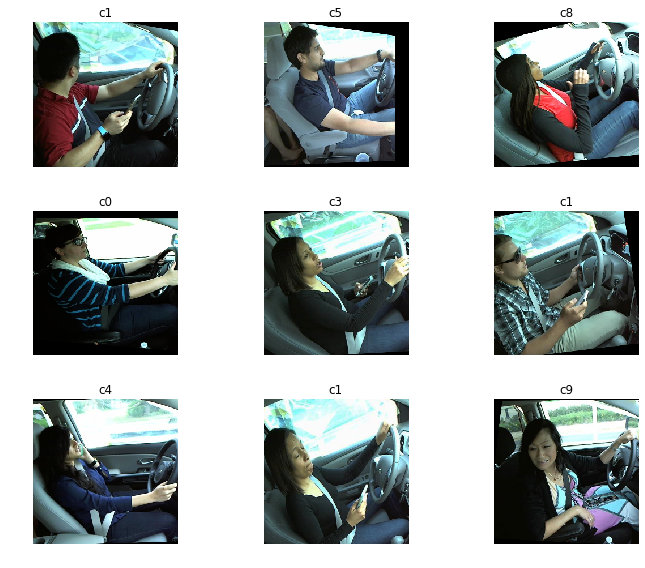

In [26]:
data.show_batch(rows=3, figsize=(10,8))

In [27]:
# Sort and Show classes
print('Classes: ',data.classes)
print('len: ',len(data.classes),data.c)

Classes:  ['c1', 'c7', 'c5', 'c3', 'c2', 'c8', 'c6', 'c0', 'c4', 'c9']
len:  10 10


Training: resnet34
Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head 
with a single hidden layer as a classifier.

In [28]:
# To create a RESNET 34 with pretrained weights
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [30]:
learn.fit_one_cycle(4)

Total time: 10:54
epoch  train_loss  valid_loss  error_rate
1      1.961057    0.971966    0.310573    (03:13)
2      1.178009    0.418374    0.116740    (02:33)
3      0.717659    0.311941    0.088106    (02:31)
4      0.521484    0.292066    0.077093    (02:35)



In [31]:
learn.save('statefarm30')

In [32]:
learn.fit_one_cycle(cyc_len=2)

Total time: 02:40
epoch  train_loss  valid_loss  error_rate
1      0.403361    0.285532    0.099119    (01:20)
2      0.355208    0.213624    0.061674    (01:19)



In [33]:
learn.save('statefarm30')

# Now we can take a look at the most incorrect images, and also the classification matrix.

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

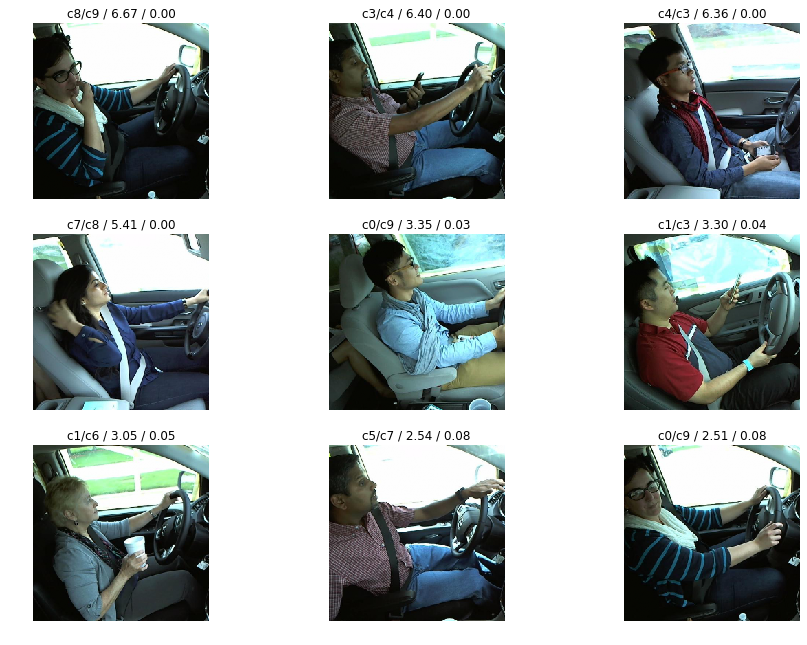

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

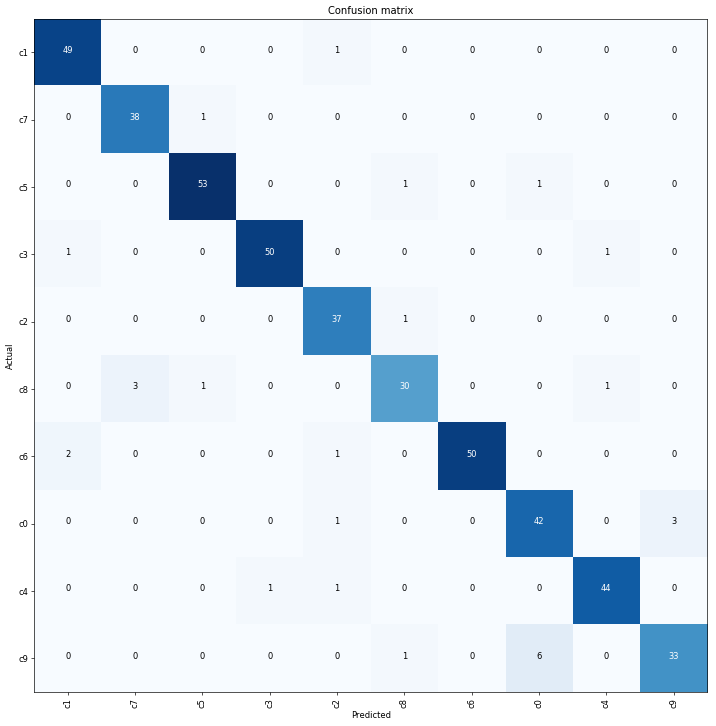

In [37]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [39]:
help(interp.most_confused)

Help on method most_confused in module fastai.vision.learner:

most_confused(min_val:int=1) -> Collection[Tuple[str, str, int]] method of fastai.vision.learner.ClassificationInterpretation instance
    Sorted descending list of largest non-diagonal entries of confusion matrix



In [38]:
interp.most_confused(min_val=0)

[('c9', 'c0', 6),
 ('c8', 'c7', 3),
 ('c0', 'c9', 3),
 ('c6', 'c1', 2),
 ('c1', 'c2', 1),
 ('c7', 'c5', 1),
 ('c5', 'c8', 1),
 ('c5', 'c0', 1),
 ('c3', 'c1', 1),
 ('c3', 'c4', 1),
 ('c2', 'c8', 1),
 ('c8', 'c5', 1),
 ('c8', 'c4', 1),
 ('c6', 'c2', 1),
 ('c0', 'c2', 1),
 ('c4', 'c3', 1),
 ('c4', 'c2', 1),
 ('c9', 'c8', 1)]

# Unfreezing, fine-tuning, and learning rates¶

In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(1)

Total time: 01:31
epoch  train_loss  valid_loss  error_rate
1      0.715183    0.349037    0.099119    (01:31)



In [42]:
learn.load('statefarm30')

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


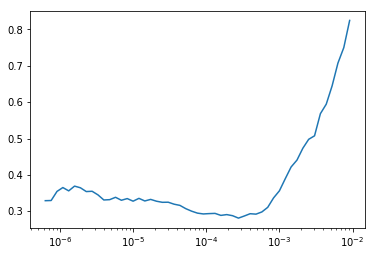

In [44]:
learn.recorder.plot()

In [45]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Total time: 02:59
epoch  train_loss  valid_loss  error_rate
1      0.273585    0.181012    0.052863    (01:29)
2      0.197408    0.175896    0.044053    (01:29)



In [46]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [69]:
help(learn.TTA)

Help on method Learner_TTA in module fastai.vision.tta:

Learner_TTA(beta:float=0.4, scale:float=1.35, is_test:bool=False, with_loss:bool=False) -> Union[torch.Tensor, Collection[_ForwardRef('Tensors')]] method of fastai.basic_train.Learner instance



# Applies Test Time Augmentation to learn on the validation set or the test test.We take the average of our regular predictions 

In [91]:
preds = learn.TTA(is_test=True, scale=1.0)[0]

Total time: 8:42:11



In [92]:
print('Images to test: ',np.shape(data.test_dl.dl.dataset.x)[0])
print('Predictions: ',np.shape(preds.numpy()))

Images to test:  79726
Predictions:  (79726, 10)


In [93]:
# Find file name
preds_name = [(path.name) for path in data.test_dl.dl.dataset.x]
preds_name[:10]

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_100000.jpg',
 'img_100001.jpg',
 'img_100002.jpg',
 'img_100003.jpg',
 'img_100004.jpg',
 'img_100005.jpg']

In [94]:
# Preds vals...
preds_val = preds.numpy()
preds_val[0,:]

array([0.032357, 0.194442, 0.383494, 0.101668, 0.124096, 0.064944, 0.002519, 0.000505, 0.051243, 0.044733],
      dtype=float32)

In [95]:
# Sort classes
sorted_classes = sorted(data.classes)
sorted_classes

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [96]:
# Find best prediction
preds_id = (preds.argmax(dim=1)).numpy()
preds_id[:15]

array([2, 2, 5, 5, 3, 3, 5, 0, 6, 1, 5, 5, 5, 2, 4], dtype=int64)

In [97]:
len(preds_id)

79726

In [98]:
# Get correct class
preds_classes = list(map(lambda id: data.classes[id], preds_id)) # Use original classes order
preds_classes[:10]

['c5', 'c5', 'c8', 'c8', 'c3', 'c3', 'c8', 'c1', 'c6', 'c7']

In [99]:
print(len(preds_name))

79726


In [100]:
len(preds_classes)

79726

In [101]:
len(data.test_dl.dl.dataset.x)

79726

In [102]:
df = pd.DataFrame({'name': preds_name, 'path':data.test_dl.dl.dataset.x,'cls': preds_classes})

In [104]:
df['description'] = df.cls.map(lambda k: desc_dict[k])
df.head()

,cls,name,path,description
0,c5,img_1.jpg,D:\Ritika Agarwal\Hackathons\Kaggle\StateFarm ...,operating the radio
1,c5,img_10.jpg,D:\Ritika Agarwal\Hackathons\Kaggle\StateFarm ...,operating the radio
2,c8,img_100.jpg,D:\Ritika Agarwal\Hackathons\Kaggle\StateFarm ...,hair and makeup
3,c8,img_1000.jpg,D:\Ritika Agarwal\Hackathons\Kaggle\StateFarm ...,hair and makeup
4,c3,img_100000.jpg,D:\Ritika Agarwal\Hackathons\Kaggle\StateFarm ...,texting - left


'img_1.jpg : operating the radio'

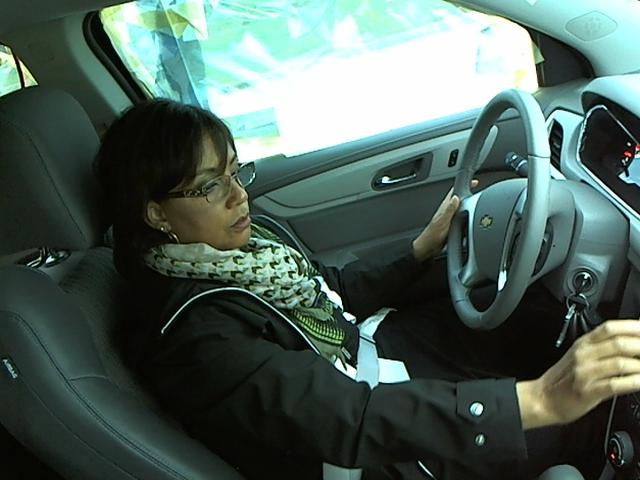

'img_10.jpg : operating the radio'

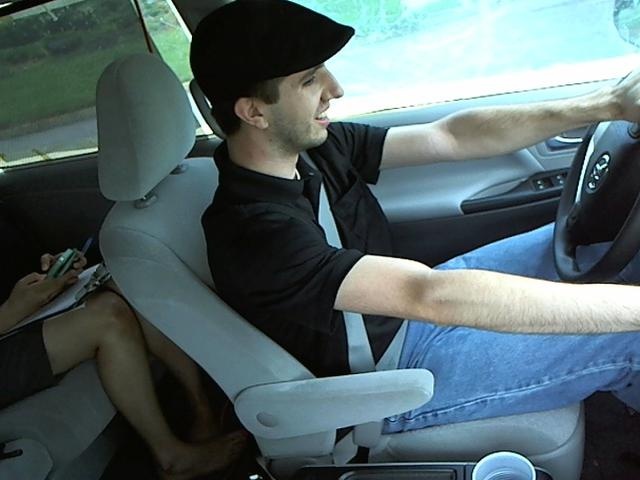

'img_100.jpg : hair and makeup'

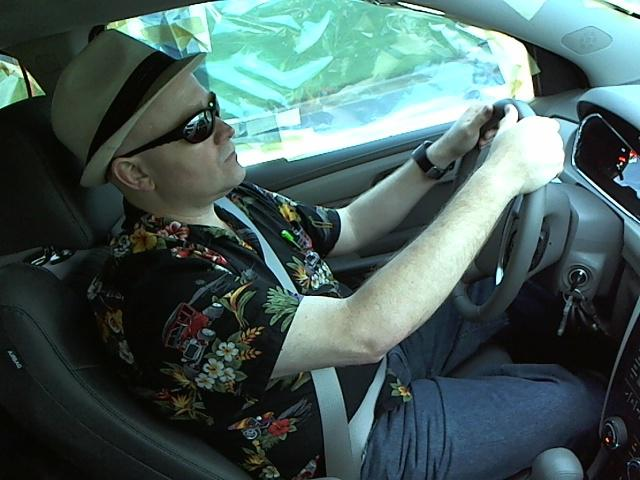

'img_1000.jpg : hair and makeup'

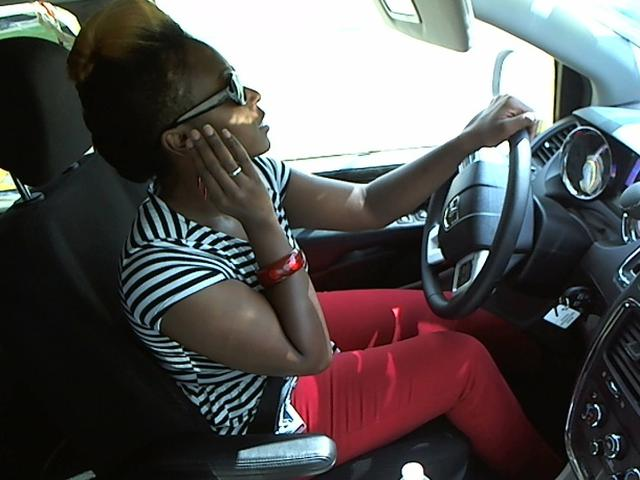

'img_100000.jpg : texting - left'

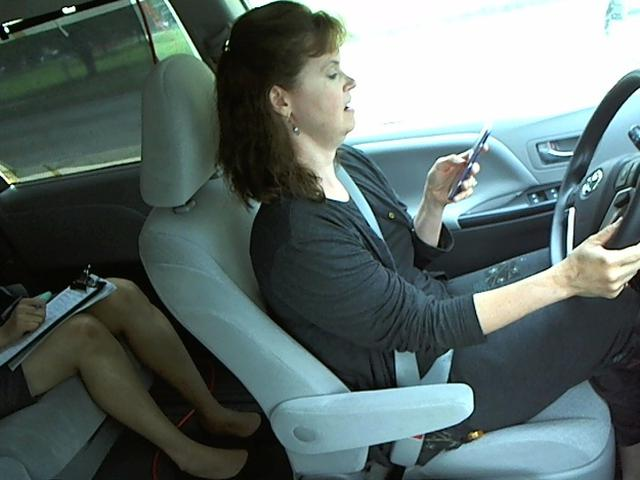

In [114]:
import IPython
for index, row in df[0:5].iterrows():
    display(row['name'] + ' : ' + row.description)
    display(IPython.display.Image(filename=row.path.as_posix()))

In [107]:
# Actual Preds:
preds_final = preds.numpy()
print(preds_final[:10])

[[3.235703e-02 1.944419e-01 3.834939e-01 1.016675e-01 ... 2.518787e-03 5.045666e-04 5.124334e-02 4.473332e-02]
 [2.126886e-03 9.120150e-03 7.318522e-01 1.347923e-02 ... 3.505108e-03 2.744531e-02 5.922864e-03 2.033639e-03]
 [5.721968e-02 1.284773e-01 1.944307e-02 2.104826e-02 ... 3.948351e-02 7.803780e-02 4.401732e-03 2.328436e-02]
 [3.088596e-02 2.802356e-03 6.513933e-03 3.128194e-03 ... 6.995560e-02 7.495631e-03 1.278473e-02 2.945444e-02]
 ...
 [5.519171e-03 2.909036e-02 1.484817e-02 9.225351e-02 ... 1.302696e-01 1.447592e-03 2.181648e-01 7.357149e-02]
 [3.921812e-01 8.488439e-02 5.971119e-03 9.395015e-03 ... 1.163975e-03 2.537899e-01 1.014785e-03 2.207959e-01]
 [7.703203e-04 1.453970e-03 5.514629e-03 1.394601e-04 ... 7.435845e-01 2.530666e-04 6.562034e-04 3.872396e-03]
 [1.445383e-03 9.282069e-01 4.692209e-02 4.802545e-03 ... 3.530763e-03 1.736422e-04 2.552284e-03 6.841068e-04]]


In [108]:
def softmax(x):
    if x.ndim == 1:
        x = x.reshape((1, -1))
    max_x = np.max(x, axis=1).reshape((-1, 1))
    exp_x = np.exp(x - max_x)
    return exp_x / np.sum(exp_x, axis=1).reshape((-1, 1))

In [109]:
preds_softmax = softmax(preds_final)
print(preds_softmax[:10,:])

[[0.092864 0.109205 0.131931 0.099529 ... 0.090134 0.089953 0.094635 0.094021]
 [0.088142 0.088761 0.182852 0.089149 ... 0.088264 0.090402 0.088477 0.088134]
 [0.094089 0.101038 0.090601 0.090746 ... 0.092435 0.096068 0.089248 0.090949]
 [0.091516 0.088981 0.089312 0.08901  ... 0.095162 0.0894   0.089874 0.091385]
 ...
 [0.090476 0.092634 0.091324 0.098674 ... 0.102498 0.090109 0.111914 0.096848]
 [0.132711 0.0976   0.090194 0.090503 ... 0.089762 0.115559 0.089748 0.111809]
 [0.087901 0.087962 0.088319 0.087846 ... 0.184755 0.087856 0.087891 0.088175]
 [0.08631  0.218046 0.090325 0.0866   ... 0.08649  0.0862   0.086405 0.086244]]


In [112]:
# Submission with probability
import pandas as pd
submit = pd.DataFrame({'img': preds_name})
for i,c in enumerate(data.classes):
    submit[c]=(preds_softmax[:,i])
cols = ['img']+sorted_classes
submit = submit[cols]

In [115]:
submit.head(15)

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.089953,0.092864,0.101787,0.099529,0.094635,0.131931,0.090134,0.109205,0.095940,0.094021
1,img_10.jpg,0.090402,0.088142,0.088181,0.089149,0.088477,0.182852,0.088264,0.088761,0.107638,0.088134
2,img_100.jpg,0.096068,0.094089,0.089592,0.090746,0.089248,0.090601,0.092435,0.101038,0.165235,0.090949
3,img_1000.jpg,0.089400,0.091516,0.109877,0.089010,0.089874,0.089312,0.095162,0.088981,0.165483,0.091385
4,img_100000.jpg,0.088668,0.088278,0.088700,0.177598,0.095128,0.088676,0.088769,0.089582,0.104637,0.089963
5,img_100001.jpg,0.087585,0.088284,0.087658,0.191439,0.087781,0.103429,0.087714,0.087718,0.089837,0.088556
6,img_100002.jpg,0.090109,0.090476,0.098305,0.098674,0.111914,0.091324,0.102498,0.092634,0.127218,0.096848
7,img_100003.jpg,0.115559,0.132711,0.089833,0.090503,0.089748,0.090194,0.089762,0.097600,0.092281,0.111809
8,img_100004.jpg,0.087856,0.087901,0.090413,0.087846,0.087891,0.088319,0.184755,0.087962,0.108881,0.088175
9,img_100005.jpg,0.086200,0.086310,0.086766,0.086600,0.086405,0.090325,0.086490,0.218046,0.086614,0.086244


In [117]:
subm_file = (path/'submission.csv').as_posix()
print(subm_file)

D:/Ritika Agarwal/Hackathons/Kaggle/StateFarm DistractedDriver/imgs/submission.csv


In [119]:

# Create submission
submit.to_csv(subm_file + '.gz', index=False, compression='gzip')

In [120]:
# Submit to kaggle
!kaggle competitions submit -f {subm_file} -m "Submission reviewed" {competition_name}

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
